<a href="https://colab.research.google.com/github/eoinleen/biochem-general/blob/main/AKTA_xls_GS_defensive_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mL7 | Fractions
nan | (Fractions)
0.0 | 1
0.09 | 2
1.09 | 3
2.09 | 4
3.09 | 5
4.09 | 6
5.09 | 7
6.09 | 8
7.09 | 9
8.09 | 10
9.09 | 11
10.09 | 12
11.09 | 13
12.09 | 14
13.09 | 15
14.09 | 16
15.09 | 17
16.09 | 18
17.09 | 19
18.09 | 20
19.09 | 21
20.09 | 22
21.09 | 23
22.09 | 24
23.09 | 25
24.09 | 26
25.09 | 27
26.09 | 28
27.09 | 29
28.09 | 30
29.09 | 31
30.09 | 32
31.09 | 33
32.09 | 34
33.09 | 35
34.09 | 36
35.09 | 37
36.09 | 38
37.09 | 39
38.09 | 40
39.09 | 41
40.09 | 42
41.09 | 43
42.09 | 44
43.09 | 45
44.09 | 46
45.08 | 47
46.08 | 48
47.08 | 49
48.08 | 50
49.08 | 51
50.08 | 52
51.08 | 53
52.08 | 54
53.08 | 55
54.08 | 56
55.08 | 57
56.08 | 58
57.08 | 59
58.08 | 60
59.08 | 61
60.08 | 62
61.08 | 63
62.08 | 64
63.08 | 65
64.08 | 66
65.08 | 67
66.08 | 68
67.08 | 69
68.08 | 70
69.08 | 71
70.08 | 72
71.08 | 73
72.08 | 74
73.08 | 75
74.08 | 76
75.08 | 77
76.09 | 78
77.09 | 79
78.09 | 80
79.09 | 81
80.09 | 82
81.09 | 83
82.09 | 84
83.09 | 85
84.09 | 86
85.09 | 87
86.09 | 88
87.09 | 89


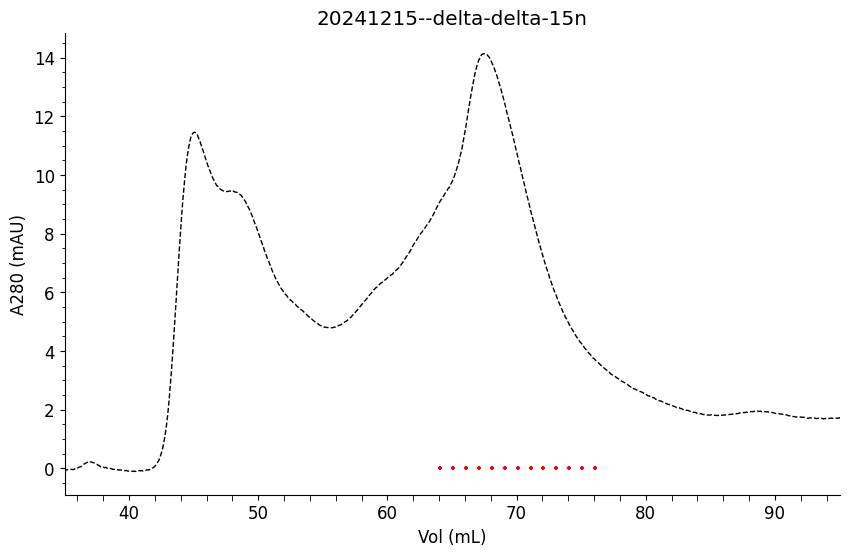

In [10]:
"""
# Size-Exclusion Chromatography (SEC) Data Processing and Visualization

## Purpose:
This script is developed to efficiently process and visualize Size-Exclusion Chromatography (SEC) data extracted from Excel (.xls) files. The key functionalities include reading SEC data safely, preprocessing and validating the data, visualizing the correlation between volume (mL) and absorbance (mAU), and highlighting specific fractions of interest.

## Development and Contributions:
- **Initial Development:** Eoin Leen, in collaboration with Windows Copilot.
- **Enhancements:** Refined and enhanced by Claude AI for improved robustness, readability, and error handling.

## Key Features:
1. **Data Reading:** Safely reads SEC data from an Excel file, ensuring the file exists and is properly formatted.
2. **Data Preprocessing:** Validates and preprocesses data, including renaming columns and converting relevant columns to numeric types.
3. **Data Visualization:** Plots the relationship between volume (mL) and absorbance (mAU), with customizable fraction highlighting.
4. **Error Handling:** Implements robust error handling to manage common issues such as file not found, empty data frames, and data type conversions.
5. **Dynamic Plot Titling:** Automatically extracts the file name (excluding the suffix) and uses it as the plot title for better context and clarity.

## Usage Instructions:
1. **File Path Specification:** Update the `file_path` variable with the path to your SEC data Excel file.
2. **Running the Script:** Execute the script to read, preprocess, and plot the SEC data.
3. **Customization:** Modify the fraction range parameters `fraction_start` and `fraction_end` in the `plot_sec_data` function as needed.

## Requirements:
- **Python Packages:** pandas, matplotlib

## Example Command:
```bash
python sec_data_processing.py
"""


import os
import pandas as pd
import matplotlib.pyplot as plt

def read_sec_data(file_path):
    """
    Safely read SEC data from an Excel file with error handling.

    Args:
        file_path (str): Path to the Excel file

    Returns:
        pd.DataFrame: Processed DataFrame or None if error occurs
    """
    try:
        # Validate file exists and is readable
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")

        # Read Excel file with error handling
        df = pd.read_excel(file_path, header=1)

        # Validate DataFrame is not empty
        if df.empty:
            raise ValueError("The DataFrame is empty. Check the file content.")

        # Rename columns to match expected structure
        df.columns = [
            'ml1', 'mAu1', 'ml2', 'mS/cm', 'ml3', 'ml8', 'ml4', 'MPa',
            'ml5', 'C', 'ml6', '%B', 'ml7', 'Fractions', 'ml8', 'Injections',
            'ml9', 'Set Marks'
        ]

        # Convert columns to numeric, handling potential errors
        numeric_columns = ['ml1', 'mAu1', 'ml7']
        for col in numeric_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        return df

    except Exception as e:
        print(f"Error reading SEC data: {e}")
        return None

def plot_sec_data(df, file_name, fraction_start=64.08, fraction_end=76.09):
    """
    Create a plot of SEC data with specified fraction range.

    Args:
        df (pd.DataFrame): Processed DataFrame
        file_name (str): Name of the file (excluding the suffix)
        fraction_start (float): Start of fraction range
        fraction_end (float): End of fraction range
    """
    if df is None:
        print("Cannot create plot. Invalid DataFrame.")
        return

    try:
        # Filter the DataFrame to include only the specified range for ml7
        filtered_df = df[(df['ml7'] >= fraction_start) & (df['ml7'] <= fraction_end)]

        # Set font properties
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['font.size'] = 12

        # Create the plot
        plt.figure(figsize=(10, 6))

        # Plot mL vs mAU with dashed line
        plt.plot(df['ml1'], df['mAu1'], linestyle='--', linewidth=1, color='black')

        # Plot filtered fractions as fine red crosses at y=0
        plt.scatter(filtered_df['ml7'], [0]*len(filtered_df), marker='+', color='red', s=10, zorder=3)

        # Set the x-axis limits to show only the specified range
        plt.xlim(35, 95)

        # Add major tick marks every 10 mL and minor tick marks every 2 mL
        major_ticks = range(40, 100, 10)
        minor_ticks = range(40, 100, 2)
        plt.xticks(major_ticks, [f"{x}" for x in major_ticks])
        plt.tick_params(axis='x', which='minor', length=4)
        plt.minorticks_on()

        # Remove axis lines and ticks above and to the right
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        # Set the background to transparent
        plt.gca().patch.set_alpha(0.0)
        plt.gcf().patch.set_alpha(0.0)

        # Remove grid lines
        plt.grid(False)

        # Update axis labels without legend
        plt.title(file_name)
        plt.xlabel('Vol (mL)')
        plt.ylabel('A280 (mAU)')

        # Print the first 90 rows of mL7 and Fractions columns above the plot
        print("mL7 | Fractions")
        for ml7, fraction in zip(df['ml7'].head(90), df['Fractions'].head(90)):
            print(f"{ml7} | {fraction}")

        plt.show()

    except Exception as e:
        print(f"Error creating plot: {e}")

def main():
    # Use your specified file path
    file_path = '/content/drive/MyDrive/SEC-data/20241215--delta-delta-15n.xls'

    # Extract file name without suffix
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    # Read and process SEC data
    df = read_sec_data(file_path)

    # Plot the data
    plot_sec_data(df, file_name)

if __name__ == '__main__':
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')